# <center> UE22CS342AA2 - Data Analytics </center>

# <center> Worksheet 4b : Association rule mining (Market Basket Analysis) </center>

<center> Designed by Amritha GK, PESU-25 </center>

<br>

- Student name: Sanjana Boggaram J
- SRN: PES1UG22CS524
- Section:I

Assume that you travel to another parallel universe, where your alter-ego owns a side-hustle retail store. You decide to take up an exercise on association rule mining to improve your skills and extract some essential information to help your alter-ego grow their business.

Given is a dataset that contains some information regarding the transactions at the hypothetical "store".



### About the Dataset:

- BillNo - Identifier for the transaction

- Itemname - Name of the product

- Quantity - Product quantity

- Date - Date and time of the transaction

- Price - Price per item (assumed in Pound Sterling) 

- CustomerID - Identifier for the customer

- Country


For those solving with R, Use the **'arules'** and **'arulesViz'** package wherever necessary.

For those solving with Python, use the **'mlxtend'** or **'apyori'** or any other suitable package wherever necessary

## Install the required packages

In [1]:
install.packages("readxl")

install.packages("arules")

install.packages("arulesViz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load the required packages

In [2]:
library(readxl)

library(dplyr)

library(arules)

library(arulesViz)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




## Load the dataset and create dataframe

In [5]:
data <- read_excel("/kaggle/input/online-retail-dataset/Worksheet-4b_Online_retail_dataset.xlsx")
head(data)

Warning message:
“Expecting numeric in A288774 / R288774C1: got 'A563185'”
Warning message:
“Expecting numeric in A288775 / R288775C1: got 'A563186'”
Warning message:
“Expecting numeric in A288776 / R288776C1: got 'A563187'”


BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


## Dataset preparation

Perform data cleaning, Transform the representation as suitable for this problem

Some hints to help you get started:
- Check the summary, number of rows and columns
- Remove duplicate entries
- Check which columns contain information that is necessary for this exercise
- Remove rows with NA values in these columns.

### (1 point)

     BillNo         Itemname            Quantity       
 Min.   :536365   Length:522064      Min.   :-9600.00  
 1st Qu.:547892   Class :character   1st Qu.:    1.00  
 Median :560603   Mode  :character   Median :    3.00  
 Mean   :559951                      Mean   :   10.09  
 3rd Qu.:571892                      3rd Qu.:   10.00  
 Max.   :581587                      Max.   :80995.00  
 NA's   :3                                             
      Date                            Price              CustomerID    
 Min.   :2010-12-01 08:26:00.00   Min.   :-11062.060   Min.   :12346   
 1st Qu.:2011-03-28 10:15:00.00   1st Qu.:     1.250   1st Qu.:13950   
 Median :2011-07-20 08:59:00.00   Median :     2.080   Median :15265   
 Mean   :2011-07-04 12:51:20.77   Mean   :     3.827   Mean   :15317   
 3rd Qu.:2011-10-19 14:12:00.00   3rd Qu.:     4.130   3rd Qu.:16837   
 Max.   :2011-12-09 12:50:00.00   Max.   : 13541.330   Max.   :18287   
                                                

[1] 522064      7

Warning message in asMethod(object):
“removing duplicated items in transactions”


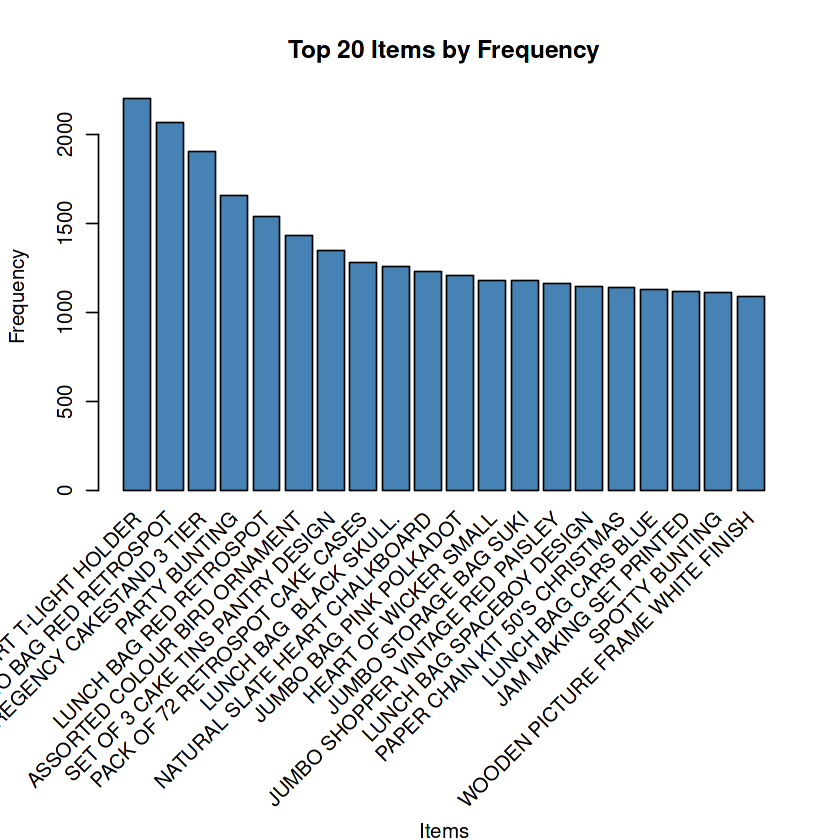

In [6]:
summary(data)
dim(data)

data <- data %>% distinct() %>% filter(!is.na(BillNo) & !is.na(Itemname))

# Convert the dataframe into a list of transactions
transaction_list <- split(data$Itemname, data$BillNo)

# Convert the list into a transactions object

trans <- as(transaction_list, "transactions")

# Create an item frequency plot
# Load necessary library
library(arules)

# Create an item frequency plot
itemFrequencyPlot(
  trans,
  topN = 20,                  
  type = "absolute",          
  col = "steelblue",           
  main = "Top 20 Items by Frequency",
  xlab = "Items",
  ylab = "Frequency"
)


## Problem 1

1. What are the 10 most popular itemsets, given Minimum Support Count = 0.02? Display the itemsets, frequency and support.

2. Find Confidence and Lift of the association rule "{PINK REGENCY TEACUP AND SAUCER} => {GREEN REGENCY TEACUP AND SAUCER}".

3. Based on the value of Lift, what do you infer regarding the given association rule?


### 3 points (1+1+1)

In [7]:
library(arules)

In [8]:
# Apply Apriori algorithm with minimum support of 0.02
frequent_itemsets <- apriori(trans, parameter = list(support = 0.02, target = "frequent itemsets"))

# Get the top 10 frequent itemsets
top_itemsets <- head(sort(frequent_itemsets, by = "support", decreasing = TRUE), 10)
inspect(top_itemsets)

# Create association rules from the frequent itemsets (support >= 0.02 and confidence >= 0.5)
rules <- apriori(trans, parameter = list(support = 0.02, confidence = 0.5))

rule <- subset(rules, subset = lhs %in% "PINK REGENCY TEACUP AND SAUCER" & rhs %in% "GREEN REGENCY TEACUP AND SAUCER")

rule_confidence <- interestMeasure(rule, measure = "confidence", transactions = trans)
rule_lift <- interestMeasure(rule, measure = "lift", transactions = trans)

print(rule_confidence)
print("Lift score:")
print(rule_lift)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 404 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4184 item(s), 20205 transaction(s)] done [0.19s].
sorting and recoding items ... [280 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.01s].
sorting transactions ... done [0.00s].
writing ... [358 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     items                                support    count
[1]  {WHITE HANGING HEART T-LIGHT HOLDER} 0.10898293 2202 
[2]  {JUMBO BAG RED RETROSPOT}            0.10215293 2064 
[3]  {REGENCY CAKESTAND 3 TIER}           0.094

The high lift values (17.03 and 18.72) indicate a strong association between the teacups, suggesting they are frequently purchased together and likely belong to a matching product line. These complementary items make excellent candidates for recommendations—customers who buy one teacup (e.g., PINK REGENCY) are likely to be interested in others (e.g., GREEN REGENCY). To maximize sales, these items should be marketed together through cross-promotion strategies.

## Problem 2

1. What are the top-5 itemsets that you would recommend for cross-selling?

Hint: Association rules. List the antecedents, consequents, support, confidence and lift.


2. Recount a personal experience where you have come across cross-selling or up-selling in any of your purchases (be it online, at restaurants or some other place). Was it useful to you? Did you accept or decline the offer?



### 2 points (1+1)

In [13]:
# Apply Apriori algorithm with minimum support of 0.02 and confidence of 0.5
rules <- apriori(
  data = trans, 
  parameter = list(support = 0.02, confidence = 0.5)
)

sorted_rules <- sort(rules, by = "lift", decreasing = TRUE)

top_5_rules <- sorted_rules[1:5]

# Inspect the top 5 rules
inspect(top_5_rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 404 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4184 item(s), 20205 transaction(s)] done [0.20s].
sorting and recoding items ... [280 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.01s].
writing ... [53 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
    lhs                                   rhs                                  support confidence   coverage     lift count
[1] {GREEN REGENCY TEACUP AND SAUCER,                                                                                      
     ROSES REGENCY TEACUP AND SAUCER}

### Personal Experience with Cross-Selling  

While shopping for a **smartphone** online, I was recommended complementary items like a **screen protector** and a **phone case** with the tagline “Protect your device and make it your own!” These suggestions highlighted practical add-ons that would safeguard my purchase and personalize it to my preferences.  

- **Usefulness:** The recommendations were practical and aligned with my needs.  
- **Outcome:** I purchased the phone case but skipped the screen protector, as I already had one in mind.  

### Key Takeaways:  
- **Relevance Drives Action:** Recommendations that address immediate or practical needs are more likely to be accepted.  
- **Personalized Suggestions Matter:** Cross-selling works best when the suggested items enhance the main purchase, as was the case with the phone accessories.  

### Conclusion:  
This cross-selling approach improved my shopping experience by offering relevant add-ons, making the process more convenient and tailored to my needs.

## Problem 3

Find out a new set of association rules with minimum support=0.025 and minimum confidence = 0.7.

1. Plot a graph of the first 5 association rules (sorted by confidence). 
What are the 3 most important rules on this graph?
2. For R, Plot a Grouped Matrix using these rules, with k = 20. ('k' is the number of groups of itemsets that will be plotted. State 2 points of observations from the plot.
3. For Python, Visualize a scatter plot of the support against confidence (label the corresponding rule). State 2 points of observations from the plot.

For those using the *'arulesViz'* package. You can refer the necessary sections in the documentation of the package for a better understanding on how to interpret the graphs.grphs.



### 4 points (2+2)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.025      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 505 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4184 item(s), 20205 transaction(s)] done [0.20s].
sorting and recoding items ... [178 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.01s].
writing ... [9 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                                    rhs                                   support confidence   coverage     lift count
[1] {PINK REGENCY TEACUP AND SAUCER}    => {ROSES REGENCY TEACUP AND SAUCER}  0.02821084  0.7744565 0.03642663 15.44708   570
[2] {PINK REGENCY TEACUP AND SAUCE

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


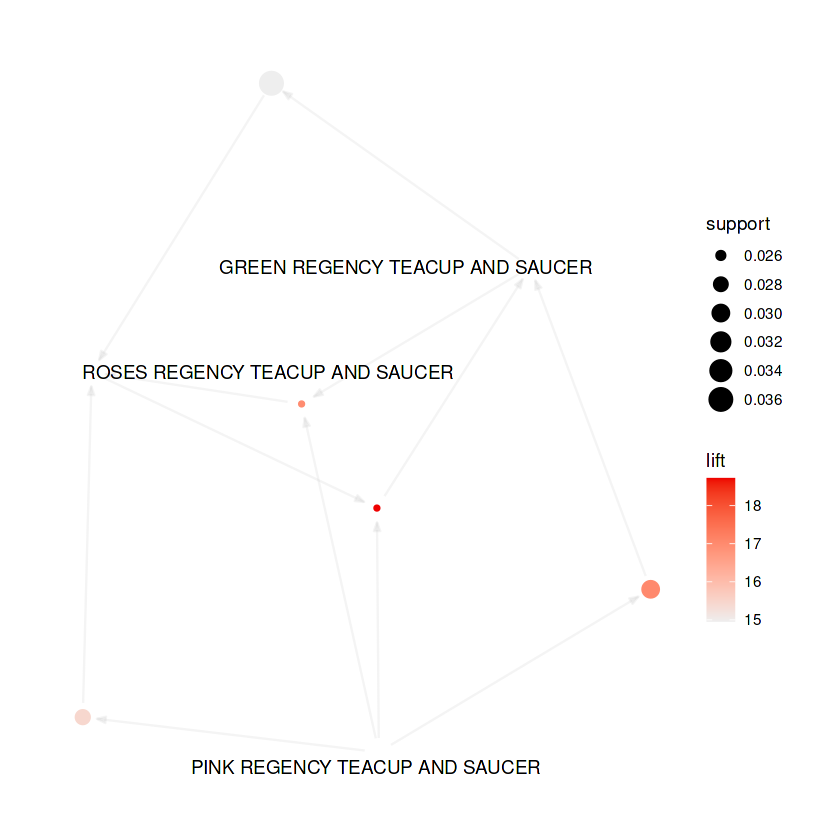

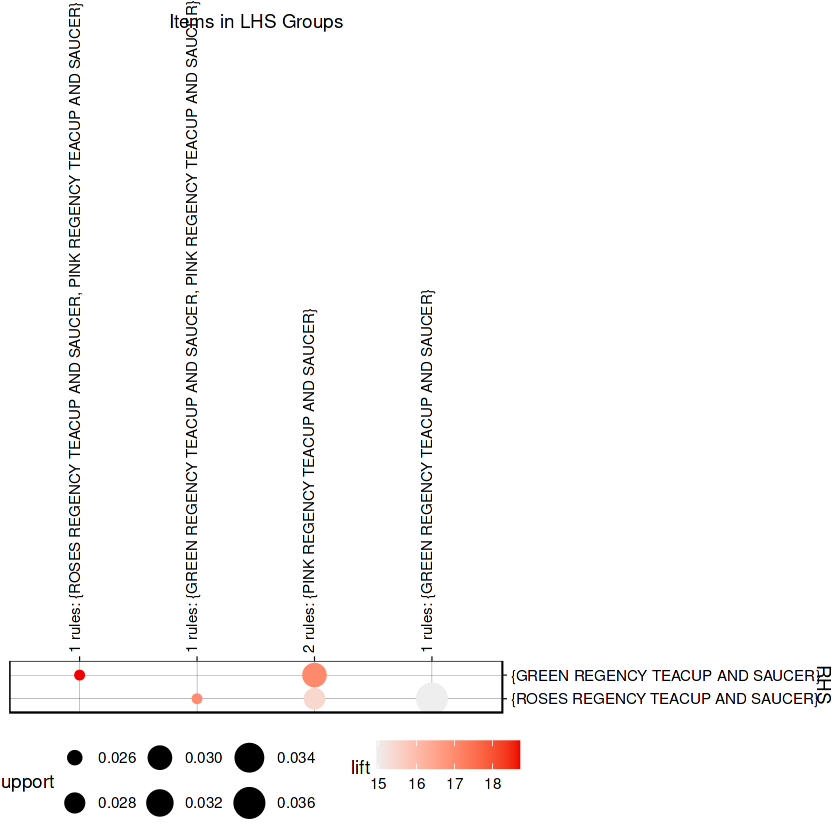

In [11]:
library(arulesViz)

rules <- apriori(
  data = trans, 
  parameter = list(support = 0.025, confidence = 0.7)
)

# Inspect the first few rules
inspect(head(rules))

# Extract the top 5 rules sorted by confidence
top_rules <- sort(rules, by = "confidence", decreasing = TRUE)[1:5]

# Visualize the top rules using a graph-based method
plot(
  top_rules, 
  method = "graph", 
  control = list(type = "items")
)

# Visualize the top rules using a grouped matrix layout
plot(
  top_rules, 
  method = "grouped", 
  control = list(k = 20)
)

3 most important rules:
}
Rule 1: {PINK REGENCY TEACUP AND SAUCER} => {GREEN REGENCY TEACUP AND SAUCER}

Rule 2: {ROSES REGENCY TEACUP AND SAUCER} => {PINK REGENCY TEACUP AND SAUCER}

Rule 3: {ROSES REGENCY TEACUP AND SAUCER} => {GREEN REGENCY TEACUP AND SAUCER}

------

With this, we draw a close to our multiverse adventure and head back to our original world.



Hope this exercise helped you learn something new and hone your skills as a Data Analyst!



Until next time :)